In [1]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps
import cartopy.crs as ccrs
from polar_stereo_function import circular_polar_plot

In [2]:
file   = 'WACCMX+DART_UVTGPH_2009011900-2009030523.nc'
ds=xr.open_dataset(file)
ds=ds.rename({"nc": "lon","nr":"lat"})

In [ ]:
ds 

In [3]:
# plt.contourf(ds.GPH[0,0,:,:],cmap='jet')
# plt.xlabel('LONGITUDE INDEX')
# plt.ylabel('LATITUDE INDEX')
# plt.title('surface pressure')

# plt.show()

data_U = xr.DataArray(ds.U[0,75,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])
data_V = xr.DataArray(ds.V[0,75,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])
wind_speed = np.sqrt(np.power(data_U,2)+np.power(data_V,2))
data_windSpeed = xr.DataArray(wind_speed, coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])

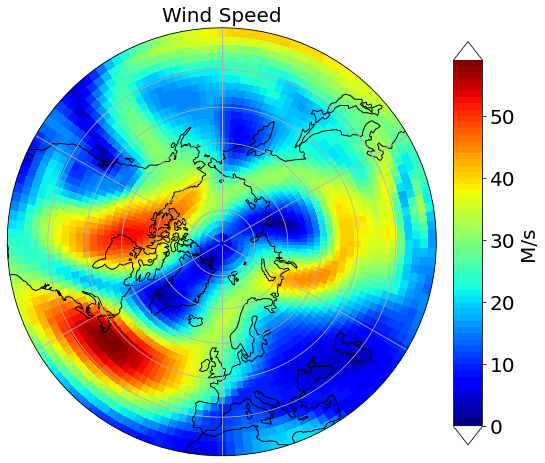

In [4]:
circular_polar_plot(wind_speed, 30, 'jet', 'Wind Speed',
                    cbar_label='M/s', levels_=np.arange(0,60,1), cbar_levels_=np.arange(0,60,10))
plt.show()

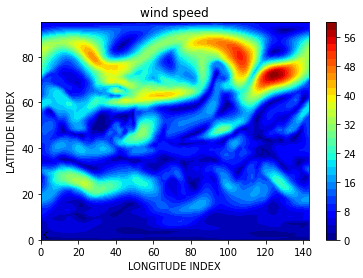

In [5]:

plt.contourf(wind_speed,30,cmap='jet')
plt.xlabel('LONGITUDE INDEX')
plt.ylabel('LATITUDE INDEX')
plt.title('wind speed')
plt.annotate('K',(.5,.5))
plt.colorbar()

plt.show()

In [ ]:
wind_speed.max()
wind_speed.min()
